### Neshyba 2023

# Analytical solutions to the harmonic oscillator

Analytical solution of $H\psi=E\psi$ when the potential energy is ${1 \over 2}kx^2$ yields

$$
E_n = \hbar \sqrt {k \over \mu} \bigl (n+{1 \over 2} \bigr ) \ \ \ \ (1)
$$

and 

$$
\psi(x)  = c_n H_n(\xi)e^{-{1 \over 2} \xi^2} \ \ \ \ (2)
$$

where $c_n$ is a normalization constant, 

$$
c_n = {1 \over \sqrt{2^n n!}} ({\alpha \over \pi})^{1/4} \ \ \ \ (3)
$$

and 

$$
\alpha = \bigl ( {k \mu \over \hbar^2} \bigr )^{1/2} \ \ \ \ (4)
$$ 

We've also used a scaled x-coordinate here, as the argument to the Hermite polynomial,

$$
\xi = \alpha^{1/2}x \ \ \ \ (5)
$$

Figure 1 shows an example solution, along with the potential energy. Elevating the depiction to $E_n$ is a useful way of displaying this, because where that energy meets the potential energy (i.e., where the dashed line crosses the gray line) marks the *classical turning point* -- the maximum possible extension or compression of the oscillator, according to classical mechanics.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/HarmonicOscillator10.jpg" height="500" width="500"/>
<strong>Figure 1</strong>. The $n=10$ solution to the harmonic oscillator Schrödinger Equation (blue) with the corresponding harmonic potential (gray).
</p>

## Molecular context
We should add that the foregoing is based on a Hamiltonian operator in which the kinetic energy is represented by

$$
-{\hbar^2 \over 2\mu} \nabla^2 \ \ \ \ (6)
$$ 

A difference you might notice here compared to previous formulations (of, say, an electron) is that there's a $\mu$ in the denominator, rather than an $m$. That's because, in a molecular context, harmonic oscillator theory is often used to describe the vibration between two atoms that bonded by a covalent bond. In that case, it's appropriate to substitute a *reduced mass* for $m$. For two masses, $m_1$ and $m_2$, the expression for the reduced mass is

$$
\mu = {m_1 m_2 \over m_1+m_2} \ \ \ \ (7)
$$

This reduced mass is smaller than both $m_1$ and $m_2$, although when one atom is a lot lighter than the other, $\mu$ is pretty close to the lighter mass, because it does most of the moving (see, e.g., http://www.huntresearchgroup.org.uk/teaching/teaching_comp_chem_203_qm/HCl_vibration.gif). One should also note that the masses we'll be concerned with here are big compared to electrons, because we're moving around entire atoms. Isotopically-averaged atomic masses, in amu, are available in the literature; see for example https://sciencenotes.org/wp-content/uploads/2020/04/PeriodicTableAtomicMassBW.png.


## Learning goals
The main learning goals of this exercise are 
1. I know how to put together wavefunctions and eigenenergies of a harmonic oscillator.
1. I can tell where the classical turning points are, and from that infer the extent to which tunneling is occurring.
1. I can explain the shape of $\psi$ close to the center ($x \approx 0$) in terms of the de Broglie wavelength.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
%matplotlib notebook

In [2]:
# Constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree')
h = hbar*2*np.pi
c = AssignQuantity(137,'bohr/atomic_unit_of_time')

### Define a numerical Hermite polynomial function
In the cell below, we use Sympy's analytical function to create a numerical Hermite polynomial function. The key part of this is Python's *lambdify* functionality. Can you find it?

In [3]:
def getHermite(n,xivec):
    """ 
    This function uses lambdify to convert symbolic Hermite polynomicals to numerical form 
    The argument xivec has to be dimensionless 
    """
    from sympy import Symbol, lambdify, pprint
    from sympy.polys.orthopolys import hermite_poly

    xi = Symbol("xi")
    print('Getting a Hermite polynomial for n =',n)
    mypoly_analytical = hermite_poly(n,x=xi)
    pprint(mypoly_analytical)
    mypoly_numerical = lambdify(xi, mypoly_analytical, 'numpy')
    return mypoly_numerical(xivec)

### Trying out getHermite

Help on function getHermite in module __main__:

getHermite(n, xivec)
    This function uses lambdify to convert symbolic Hermite polynomicals to numerical form 
    The argument xivec has to be dimensionless



<IPython.core.display.Javascript object>


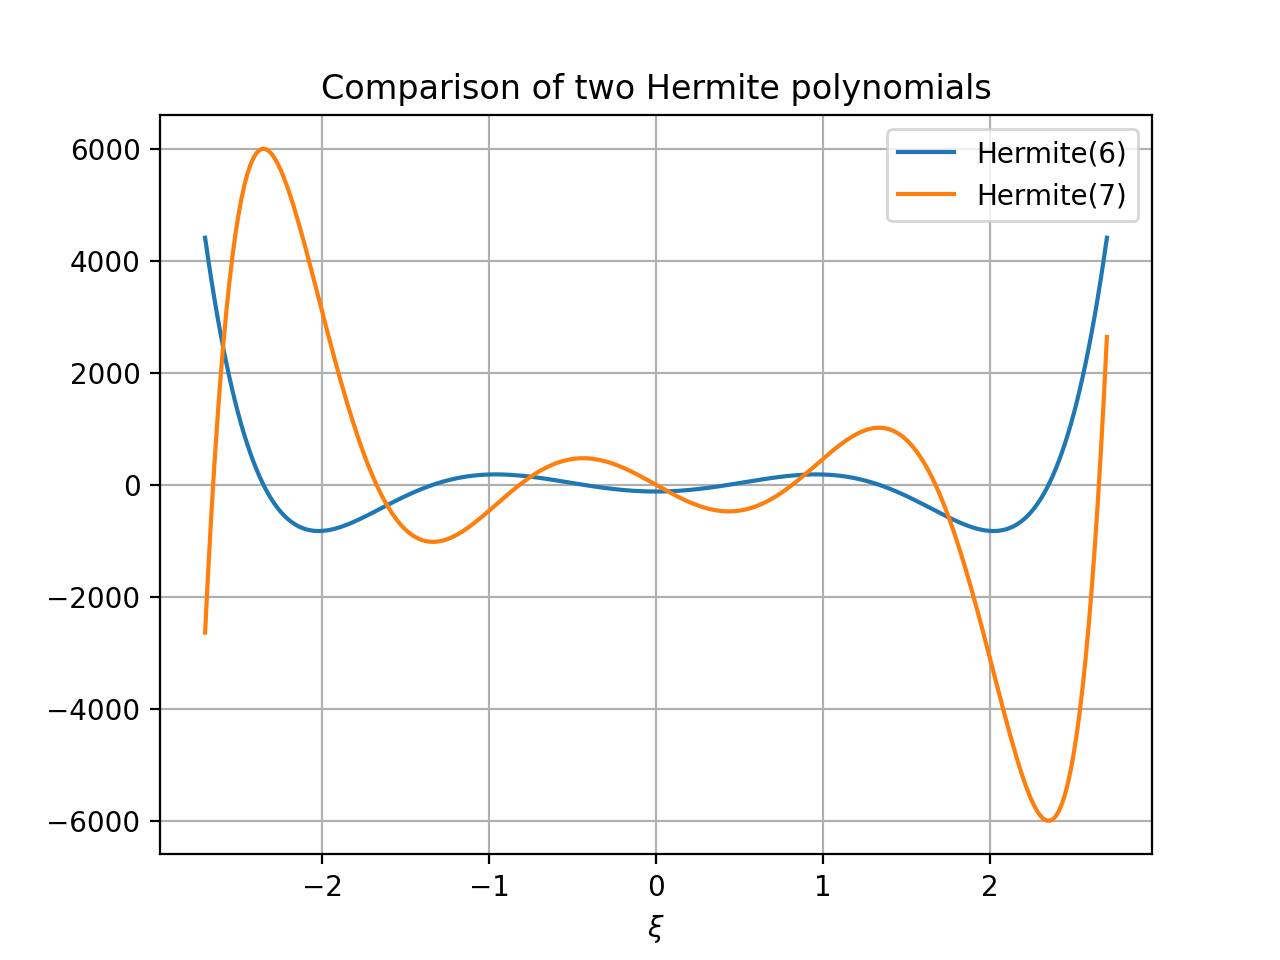

Getting a Hermite polynomial for n = 6
    6        4        2      
64⋅ξ  - 480⋅ξ  + 720⋅ξ  - 120
Getting a Hermite polynomial for n = 7
     7         5         3         
128⋅ξ  - 1344⋅ξ  + 3360⋅ξ  - 1680⋅ξ


Text(0.5, 1.0, 'Comparison of two Hermite polynomials')

In [4]:
help(getHermite)
xivec = np.linspace(-2.7,2.7,300); n = 6
plt.figure()
plt.plot(xivec,getHermite(n,xivec),label='Hermite('+str(n)+')')
plt.plot(xivec,getHermite(n+1,xivec),label='Hermite('+str(n+1)+')')
plt.grid(True)
plt.legend()
plt.xlabel(r'$\xi$')
plt.title('Comparison of two Hermite polynomials')

### Pause for analysis
See if you can figure out the relationship between the $n$ value of a Hermite polynomial, and the number of nodes (zero-crossings).

### BEGIN SOLUTION

Looks like the number of nodes is $n$.

### END SOLUTION

### Assembling wavefunctions of the harmonic oscillator


1837.4715941070517 electron_mass
64626.865501862405 electron_mass
mu = 1786.6728950351692 electron_mass
0.9801328542826583 unified_atomic_mass_unit
mu = 1786.6728950351692 electron_mass
k = 0.3313008446546531 electron_mass / atomic_unit_of_time ** 2
alpha = 24.329534299832478 / bohr ** 2
dimensionless
dimensionless
8.05881540208348e-09 / bohr ** 0.5
c = 8.05881540208348e-09 / bohr ** 0.5
Getting a Hermite polynomial for n = 15
       15            13             11              9               7         
32768⋅ξ   - 1720320⋅ξ   + 33546240⋅ξ   - 307507200⋅ξ  + 1383782400⋅ξ  - 290594

      5               3              
3040⋅ξ  + 2421619200⋅ξ  - 518918400⋅ξ
E = 0.21106705245001248 hartree


<IPython.core.display.Javascript object>


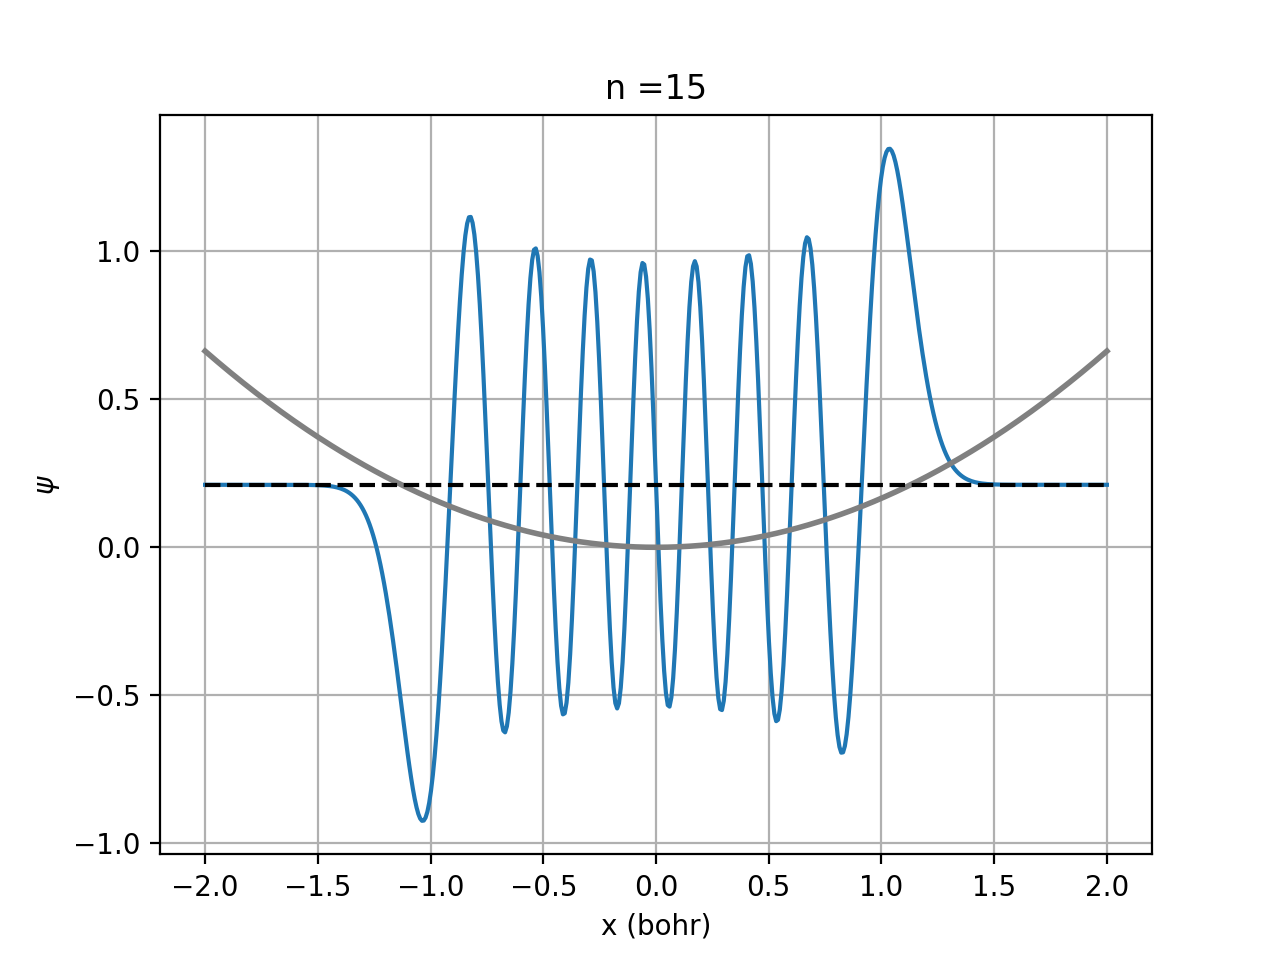

PE[0] = 0.6626016893093057 hartree


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0.5, 1.0, 'n =15')

In [17]:
# Specify the wave function we want (start with this n, but eventually we'll want n=15)
n = 15

# Also specify the range of x-values we want
xvec = AssignQuantity(np.linspace(-2,2,500),'bohr')

# Get the reduced mass of HCl
### BEGIN SOLUTION
mH = AssignQuantity(1.008,'amu')
mH.ito('atomic_unit_of_mass')
print(mH)
mCl = AssignQuantity(35.453,'amu')
mCl.ito('atomic_unit_of_mass')
print(mCl)
mu = mH*mCl/(mH+mCl)
print('mu =', mu)
print(mu.to('amu'))
print('mu =', mu)
### END SOLUTION

# Specify the force constant
### BEGIN SOLUTION
k = AssignQuantity(5.158e5,'dyne/cm')
k.ito('electron_mass / atomic_unit_of_time**2')
print('k =', k)
### END SOLUTION

# Calculate alpha
### BEGIN SOLUTION
alpha = (k*mu/hbar**2)**(1/2)
alpha.ito('1/bohr**2')
print('alpha =', alpha)
### END SOLUTION

# Make xi (and check that it's dimensionless)
### BEGIN SOLUTION
xivec = xvec*alpha**(1/2)
print(xivec.units)
xivec.ito('dimensionless')
print(xivec.units)
### END SOLUTION

# The normalization constant
### BEGIN SOLUTION
c_n = 1/np.sqrt(2**n * np.math.factorial(n)) * (alpha/np.pi)**(1/4)
print(c_n)
c_n.ito('1/bohr**(1/2)')
print('c =', c_n)
### END SOLUTION

# The Gaussian part of psi
### BEGIN SOLUTION
the_Gaussian_part = np.exp(-xivec**2/2)
### END SOLUTION

# Assembling the wave function psi and its energy E_n
### BEGIN SOLUTION
psi = c_n*getHermite(n,xivec)*the_Gaussian_part
E = hbar*np.sqrt(k/mu)*(n+1/2)
print('E =', E)
### END SOLUTION

# Plotting it
plt.figure()
plt.plot(xvec,psi.magnitude+E.magnitude)
PE = 1/2*k*xvec**2
PE.ito('hartree')
print('PE[0] =', PE[0])
plt.plot(xvec,PE.magnitude,linewidth=2,color='gray')
plt.plot([xvec[0].magnitude,xvec[-1].magnitude],[E.magnitude,E.magnitude],'k--')
plt.grid(True)
plt.xlabel('x ('+str(xvec.units)+')')
plt.ylabel(r'$\psi$')
plt.title('n ='+str(n))

### Pause for analysis: turning points and tunneling
Make sure you re-run the previous cell with $n=15$ before answering these questions.
1. Assuming the particle has an energy $E_{15}$, at what value of $\pm x$ will your oscillator enounter the classical turning points for your wave function? 
1. Does your wave function extend past those turning points? (i.e., does the particle tunnel?)

### BEGIN SOLUTION

1. Looks like about $\pm 1.1 \ bohr$.
1. Yes it does tunnel.

### END SOLUTION

### Estimating the kinetic energy from the de Broglie wavelength
In the cell below, and still referencing the same ($n=15$) state, calculate
1. The exact quantum result, $E_n$.
1. The de Broglie wavelength in the middle - where $x \approx 0$, the momentum associated with that wavelength (${h \over \lambda_{dB}}$), and the kinetic energy associated with that momentum (${p^2 \over 2\mu}$).
1. The difference (%) between the exact energy and the de Broglie-derived kinetic energy.

In [18]:
### BEGIN SOLUTION
# Getting the exact quantum result, E_n
print(n)
E_n = hbar*(k/mu)**(1/2)*(n+1/2)
print(E_n)

# Getting the de Broglie wavelength
lambda_dB = AssignQuantity(.177+.054,'bohr')
print(lambda_dB)

# The momentum
momentum = h/lambda_dB
print(momentum)

# Kinetic energy from the momentum from the de Broglie wavelength
KE = momentum**2/(2*mu); KE.ito('hartree'); print(KE)
error = (KE-E_n)/E_n*100; print(error)


### END SOLUTION

15
0.21106705245001248 hartree
0.23099999999999998 bohr
27.199936394716826 atomic_unit_of_time * hartree / bohr
0.20704308604348032 hartree
-1.9064872322908686 dimensionless


### Pause for anaysis: comparing $E_n$ to de Broglie's prediction
In the cell below, supply responses to these questions:
1. About how close (%) did your de Broglie-based estimate of the kinetic energy come to your exact quantum result?
1. Any thoughts on why these numbers are in such close agreement?

### BEGIN SOLUTION

1. It's about 2% off
1. Close to $x=0$, the potential energy is zero, so all the energy is kinetic.

### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page